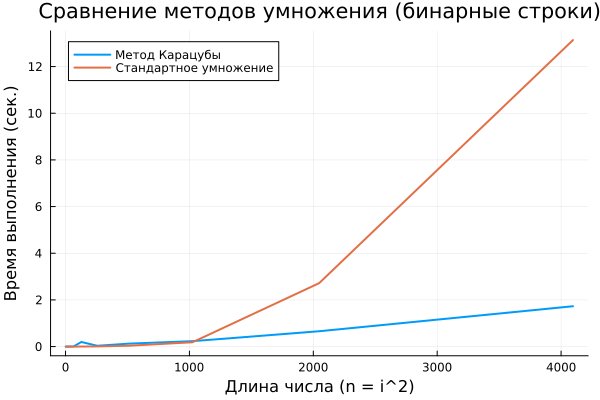

In [1]:
using Random
using Plots

function binary_add(num1::String, num2::String)
    len = max(length(num1), length(num2))
    num1 = lpad(num1, len, '0')
    num2 = lpad(num2, len, '0')

    carry = 0
    result = ""

    for i in length(num1):-1:1
        bit1 = Int(num1[i]) - Int('0')
        bit2 = Int(num2[i]) - Int('0')
        sum = bit1 + bit2 + carry
        result = string(sum % 2) * result
        carry = sum ÷ 2
    end

    if carry > 0
        result = "1" * result
    end

    return result
end

function binary_subtract(num1::String, num2::String)
    len = max(length(num1), length(num2))
    num1 = lpad(num1, len, '0')
    num2 = lpad(num2, len, '0')

    borrow = 0
    result = ""

    for i in length(num1):-1:1
        bit1 = Int(num1[i]) - Int('0')
        bit2 = Int(num2[i]) - Int('0')
        diff = bit1 - bit2 - borrow

        if diff < 0
            diff += 2
            borrow = 1
        else
            borrow = 0
        end

        result = string(diff) * result
    end

    return replace(result, r"^0+" => "")
end

function binary_multiply_single(num1::String, digit::Char)
    if digit == '0'
        return "0"
    elseif digit == '1'
        return num1
    else
        error("Недопустимый символ: $digit")
    end
end

function binary_shift_left(num::String, shift::Int)
    return num * "0"^shift
end

function karatsuba(num1::String, num2::String)
    len = max(length(num1), length(num2))
    num1 = lpad(num1, len, '0')
    num2 = lpad(num2, len, '0')

    if length(num1) == 1 || length(num2) == 1
        return binary_multiply_single(num1, num2[1])
    end

    mid = len ÷ 2
    high1, low1 = num1[1:mid], num1[mid+1:end]
    high2, low2 = num2[1:mid], num2[mid+1:end]

    z0 = karatsuba(low1, low2)
    z1 = karatsuba(binary_add(low1, high1), binary_add(low2, high2))
    z2 = karatsuba(high1, high2)

    result = binary_add(
        binary_add(
            binary_shift_left(z2, 2 * (len - mid)),
            binary_shift_left(binary_subtract(binary_subtract(z1, z2), z0), len - mid)
        ),
        z0
    )

    return result
end

function binary_multiply(num1::String, num2::String)
    result = "0"
    for i in length(num2):-1:1
        if num2[i] == '1'
            shifted = binary_shift_left(num1, length(num2) - i)
            result = binary_add(result, shifted)
        end
    end
    return result
end

function generate_random_binary(length::Int)
    return join(rand(["0", "1"], length))
end

times_karatsuba = Float64[]
times_standard = Float64[]
lengths = Int[]

for i in 1:12
    n = 2^i
    num1 = generate_random_binary(n)
    num2 = generate_random_binary(n)

    start_time = time()
    karatsuba(num1, num2)
    end_time = time()
    push!(times_karatsuba, end_time - start_time)

    start_time = time()
    binary_multiply(num1, num2)
    end_time = time()
    push!(times_standard, end_time - start_time)
    push!(lengths, n)
end

p = plot(lengths,
         [times_karatsuba, times_standard],
         label=["Метод Карацубы" "Стандартное умножение"],
         title="Сравнение методов умножения (бинарные строки)",
         xlabel="Длина числа (n = i^2)",
         ylabel="Время выполнения (сек.)",
         lw=2)
display(p)